## Understanding Keras syntax using MNIST

In [4]:
from keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 3s 0us/step


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
x_train.shape

(60000, 28, 28)

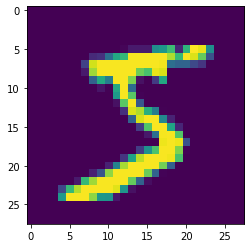

In [7]:
plt.imshow(x_train[0])

## Preprocessing

In [9]:
y_train # The labels are not one hot encoded

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
from keras.utils.np_utils import to_categorical

In [14]:
y_cat_tr  = to_categorical(y_train,10)

In [15]:
y_cat_te = to_categorical(y_test,10)

## Scaling

In [16]:
x_train = x_train/255

In [17]:
x_test = x_test/255

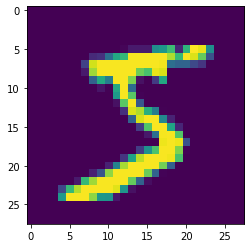

In [18]:
plt.imshow(x_train[0])

In [19]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)


## Training the model

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D,Flatten

In [21]:
model = Sequential()

# Conv Layer
model.add(Conv2D(filters = 32,kernel_size = 3,input_shape = (28,28,1),activation = 'relu'))

# Pool Layer
model.add(MaxPool2D(pool_size = (2,2)))

# Flatten
model.add(Flatten())

# Dense
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x_train,y_cat_tr,epochs = 2)

Epoch 1/2
1875/1875 [==============================] - 48s 25ms/step - loss: 0.1577 - accuracy: 0.9522
Epoch 2/2
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0536 - accuracy: 0.9843


## Evaluating the Model

In [25]:
model.metrics_names

['loss', 'accuracy']

In [27]:
model.evaluate(x_test,y_cat_te)

313/313 [==============================] - 3s 8ms/step - loss: 0.0509 - accuracy: 0.9832


[0.050906702876091, 0.9832000136375427]

In [28]:
from sklearn.metrics import classification_report

In [31]:
predictions = model.predict(x_test)

In [32]:
predictions.shape

(10000, 10)